In [8]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
TRAIN_DATASET_PATH = "./observations/experiements/dest_folder/train/"
VALIDATION_DATASET_PATH = "./observations/experiements/dest_folder/val/"
TEST_DATASET_PATH = "./observations/experiements/dest_folder/test/"

In [4]:
BATCH_SIZE = 60
EPOCHS = 50

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=BATCH_SIZE)

Found 1315 images belonging to 2 classes.


In [6]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATASET_PATH,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=BATCH_SIZE)

Found 142 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    TEST_DATASET_PATH,
    target_size=(256, 256),
    class_mode='binary',
    batch_size=BATCH_SIZE)

Found 194 images belonging to 2 classes.


In [9]:
# transfer learning
model = Sequential([
    ResNet50(include_top=False, pooling='avg', input_shape=(256, 256, 3)),
    Dense(1, activation='sigmoid')
])

In [10]:
model.layers[0].trainable = False

In [11]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=5, validation_data=validation_generator)

Epoch 1/50
5/5 [==============================] - 27s 5s/step - loss: 0.7193 - accuracy: 0.4900 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 26s 5s/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6819 - val_accuracy: 0.5070
Epoch 3/50
5/5 [==============================] - 27s 5s/step - loss: 0.6857 - accuracy: 0.5667 - val_loss: 0.6761 - val_accuracy: 0.6901
Epoch 4/50
5/5 [==============================] - 27s 5s/step - loss: 0.6848 - accuracy: 0.5633 - val_loss: 0.6739 - val_accuracy: 0.5423
Epoch 5/50
5/5 [==============================] - 27s 5s/step - loss: 0.6768 - accuracy: 0.6233 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 6/50
5/5 [==============================] - 27s 5s/step - loss: 0.6886 - accuracy: 0.5467 - val_loss: 0.6642 - val_accuracy: 0.6901
Epoch 7/50
5/5 [==============================] - 27s 5s/step - loss: 0.6749 - accuracy: 0.6100 - val_loss: 0.6611 - val_accuracy: 0.6690
Epoch 8/50
5/5 [==================

In [14]:
N = np.arange(0, EPOCHS)

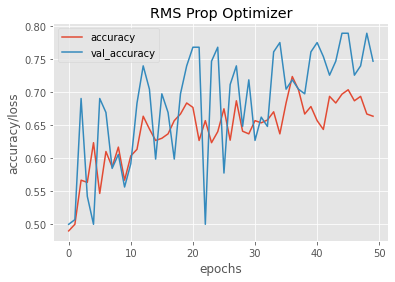

In [15]:
plt.figure()
plt.plot(N, history.history['accuracy'], label='accuracy')
plt.plot(N, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("RMS Prop Optimizer")
plt.legend()
plt.show()

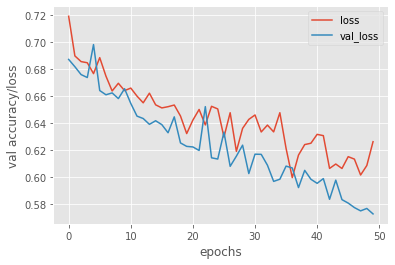

In [17]:
plt.figure()
plt.plot(N, history.history['loss'], label='loss')
plt.plot(N, history.history['val_loss'], label='val_loss')
plt.xlabel("epochs")
plt.ylabel("val accuracy/loss")
plt.legend()
plt.show()

In [18]:
model.save("model.h5")

In [19]:
# model = tf.keras.models.load_model("model.h5")

In [26]:
model.evaluate(test_generator)

4/4 [==============================] - 8s 2s/step - loss: 0.5621 - accuracy: 0.7423


[0.5620730519294739, 0.7422680258750916]

In [27]:
predictions = model.predict(train_generator)

In [28]:
confusion_matrix(train_generator.classes, np.round(predictions))

array([[237, 421],
       [232, 425]])

In [29]:
print(classification_report(train_generator.classes, np.round(predictions)))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42       658
           1       0.50      0.65      0.57       657

    accuracy                           0.50      1315
   macro avg       0.50      0.50      0.49      1315
weighted avg       0.50      0.50      0.49      1315

